# Homework 4

## Enya Liu

## Linear Regression with Gradient Descent

Your task in this assignment is to implement Multiple Linear Regression. 

We will use the New York City Taxi trip reports in the Year 2013. 
The dataset was released under the FOIL (The Freedom of Information Law) and made public by Chris Whong (\url{https://chriswhong.com/open-data/foil_nyc_taxi/}).



# Taxi Data Set
The data set itself is a simple text file. Each taxi trip report is a different line in the file. Among other things, each trip report 
includes the starting point, the drop-off point, corresponding timestamps, and information related to the payment. The data are reported 
by the time that the trip ended, i.e., upon arriving in the order of the drop-off timestamps. 
The attributes present on each line of the file are, in order:



| index | **Attribute** | **Description** |
| --- | --- | --- |
| 0 | medallion           |  an md5sum of the identifier of the taxi - vehicle bound (Taxi ID)  | 
| 1 | hack license       |  an md5sum of the identifier for the taxi license (Driver ID)  |  
| 2 | pickup datetime    | time when the passenger(s) were picked up  |  
| 3 | dropoff datetime   | time when the passenger(s) were dropped off  | 
| 4 | trip time in secs | duration of the trip  |  
| 5 | trip distance | trip distance in miles  |  
| 6 | pickup longitude | longitude coordinate of the pickup location  |  
| 7 | pickup latitude | latitude coordinate of the pickup location  |  
| 8 | dropoff longitude | longitude coordinate of the drop-off location   |  
| 9 | dropoff latitude | latitude coordinate of the drop-off location  | 
| 10 | payment type | the payment method -credit card or cash  |  
| 11 | fare amount | fare amount in dollars  |  
| 12 | surcharge | surcharge in dollars  |  
| 13 | mta tax | tax in dollars  |  
| 14 | tip amount | tip in dollars  |  
| 15 | tolls amount | bridge and tunnel tolls in dollars  |  
| 16 | total amount | total paid amount in dollars  |  




The data files are in comma separated values (CSV) format. Example lines from the file are:

07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,\\
2013-01-01,00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,\\
40.715008,CSH,3.50,0.50,0.50,0.00,0.00,4.50

22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,\\
2013-01-01,00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,\\
CSH,27.00,0.00,0.50,0.00,0.00,27.50

0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,\\
2013-01-01,00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897\\
73.965897,40.760445,CSH,4.00,0.50,0.50,0.00,0.00,5.00



In [1]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

In [24]:
df = pd.read_csv('nyc-taxi-data.csv.bz2', header=None)
# df = pd.read_csv(r'C:\Users\Ley\Desktop\nyc-taxi-data.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,2013-01-01 00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,40.715008,CSH,3.5,0.5,0.5,0.00,0.0,4.50
1,22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,2013-01-01 00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,CSH,27.0,0.0,0.5,0.00,0.0,27.50
2,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.00,0.0,5.00
3,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.00,0.0,5.00
4,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.00,0.0,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,A0AFE6B722F15B7A0FDFEEA954BE316A,93D505C96BD248DC390FD47F747D762D,2013-01-01 03:44:00,2013-01-01 03:46:00,120,0.79,-73.963593,40.710941,-74.027779,40.629894,CSH,4.5,0.5,0.5,0.00,0.0,5.50
49996,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
49997,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49998,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50


## Task - 1
The dataset is a real-world dataset and many records are incorrect and wrong. Your task is first to describe at least 4 data clean up tasks and implement them on this data set.

For example, you can define to remove lines with the following property, if a taxi trip (one of the data rows) has a travel distance less than 1 mile and total amount of more than 20 dollar, then it is an wrong record. 

Another example is that you would expect to have a float number (e.g., index 12 to 16) and then you got a String in that position. You can remove such lines from your data. 

Perform the following cleanup tasks:
1. Add column headers based on the description above (no need to describe).
2. Drop rows with a travel distance < 1 mile and a total fare > $20 (no need to describe).
3. Your own task (please describe your task in a comment/cell).
4. Your own task (please describe your task in a comment/cell).

**(4 points)**

In [39]:
# Your code here
# add a header
df.columns = ['medallion','hack license','pickup datetime','dropoff datetime','trip time in secs','trip distance', 'pickup longitude','pickup latitude', 
              'dropoff longitude','dropoff latitude','payment type','fare amount','surcharge','mta tax','tip amount','tolls amount','total amount']
# drop rows
valid_data = df.drop(df[(df['trip distance']<1) & (df['total amount']>20)].index)

In [49]:
# Your code here
# my task 
# drop rows that the sum of fare amount, surcharge...tolls amount does not equal to the total amount
sum_amount = valid_data['fare amount']+valid_data['surcharge']+valid_data['mta tax']+valid_data['tip amount']+valid_data['tolls amount']
valid_data['cost sum'] = sum_amount
valid_dataset = valid_data[valid_data['total amount']==valid_data['cost sum']]
# delete the cost sum column
del valid_dataset['cost sum']

In [51]:
# Your code here
# my task
# re-indexing the dataframe
valid_dataset = valid_dataset.reset_index(drop=True)
print(valid_dataset)

,medallion,hack license,pickup datetime,dropoff datetime,trip time in secs,trip distance,pickup longitude,pickup latitude,dropoff longitude,dropoff latitude,payment type,fare amount,surcharge,mta tax,tip amount,tolls amount,total amount,cost_sum
0,07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,2013-01-01 00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,40.715008,CSH,3.5,0.5,0.5,0.00,0.0,4.50,4.50
1,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.00,0.0,5.00,5.00
2,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.00,0.0,5.00,5.00
3,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.00,0.0,5.00,5.00
4,5FAA7F69213D26A42FA435CA9511A4FF,00B7691D86D96AEBD21DD9E138F90840,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.00,0.000000,0.000000,0.000000,0.000000,CRD,2.5,0.5,0.5,0.25,0.0,3.75,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49038,A0AFE6B722F15B7A0FDFEEA954BE316A,93D505C96BD248DC390FD47F747D762D,2013-01-01 03:44:00,2013-01-01 03:46:00,120,0.79,-73.963593,40.710941,-74.027779,40.629894,CSH,4.5,0.5,0.5,0.00,0.0,5.50,5.50
49039,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10,13.10
49040,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25,10.25
49041,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50,18.50


In [6]:
# Your code here

## Task - 2
Use the cleaned dataset from task 1.
Find out the correlations between trip distance, travel time and fare amount. Visualize the correlations in form of Scatterplot matrix. 
Describe the correlations between them. **(4 points)**

                   trip distance  trip time in secs  fare amount
trip distance           1.000000           0.774769     0.937730
trip time in secs       0.774769           1.000000     0.845007
fare amount             0.937730           0.845007     1.000000


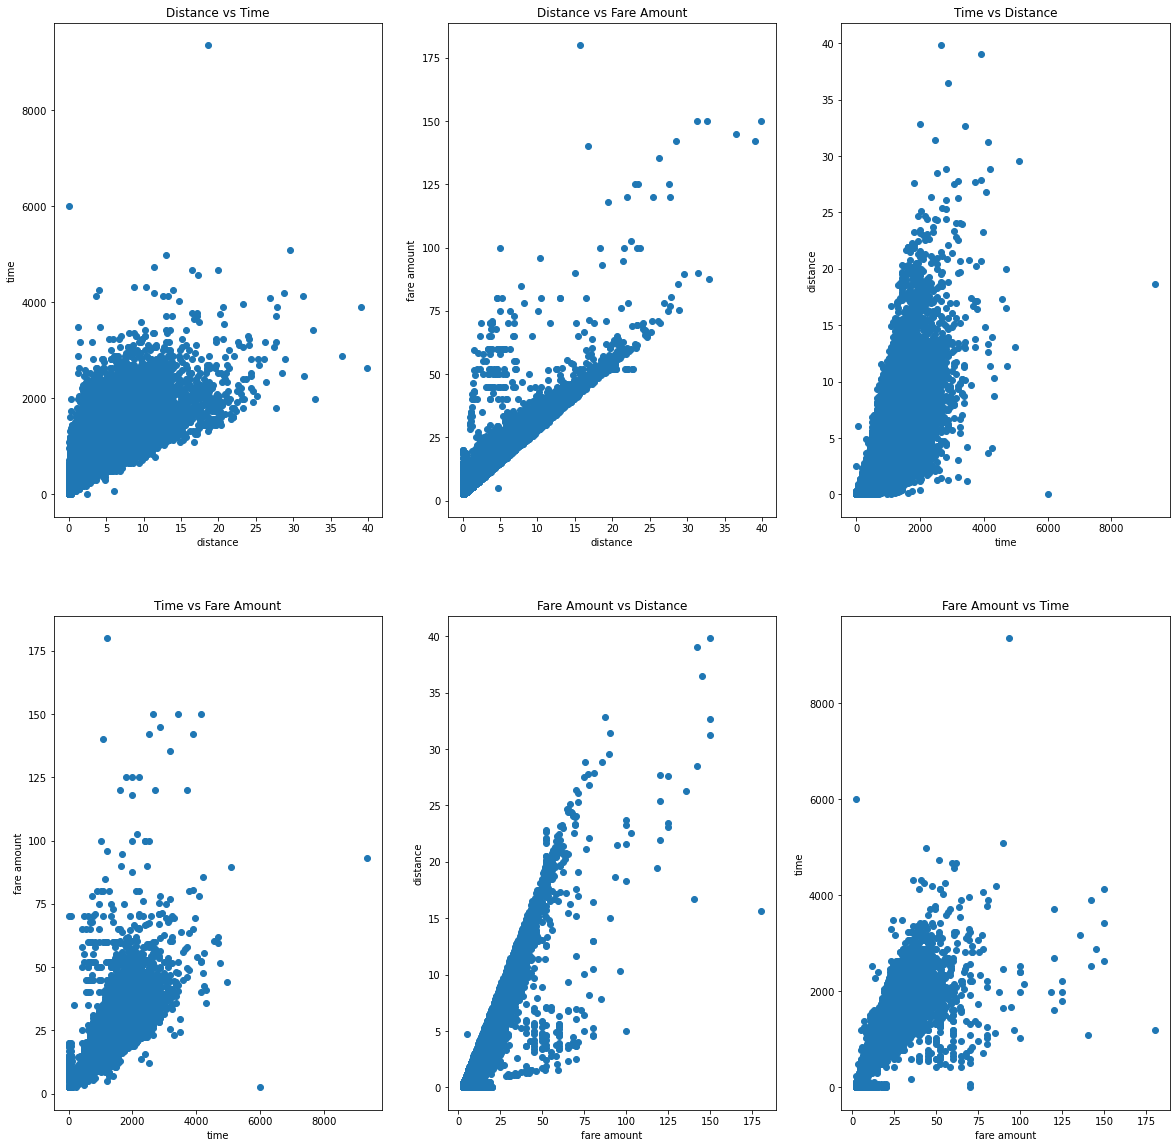

In [133]:
# Your code here
# correlations
corrs = valid_dataset[['trip distance','trip time in secs','fare amount']]
print(corrs.corr())

# scatterplot
fig = plt.figure(figsize=(20,20))

ax1=fig.add_subplot(231)
ax2=fig.add_subplot(232)
ax3=fig.add_subplot(233)
ax4=fig.add_subplot(234)
ax5=fig.add_subplot(235)
ax6=fig.add_subplot(236)
ax1.scatter(valid_dataset['trip distance'], valid_dataset['trip time in secs'])
ax2.scatter(valid_dataset['trip distance'], valid_dataset['fare amount'])
ax3.scatter(valid_dataset['trip time in secs'], valid_dataset['trip distance'])
ax4.scatter(valid_dataset['trip time in secs'], valid_dataset['fare amount'])
ax5.scatter(valid_dataset['fare amount'], valid_dataset['trip distance'])
ax6.scatter(valid_dataset['fare amount'], valid_dataset['trip time in secs'])
ax1.set_title('Distance vs Time')
ax1.set_xlabel('distance')
ax1.set_ylabel('time')
ax2.set_title('Distance vs Fare Amount')
ax2.set_xlabel('distance')
ax2.set_ylabel('fare amount')
ax3.set_title('Time vs Distance')
ax3.set_xlabel('time')
ax3.set_ylabel('distance')
ax4.set_title('Time vs Fare Amount')
ax4.set_xlabel('time')
ax4.set_ylabel('fare amount')
ax5.set_title('Fare Amount vs Distance')
ax5.set_xlabel('fare amount')
ax5.set_ylabel('distance')
ax6.set_title('Fare Amount vs Time')
ax6.set_xlabel('fare amount')
ax6.set_ylabel('time')
plt.show()

## Task - 3
Use the cleaned dataset from task 1.
We want to find a simple line to our data (distance, money). 
We want to use trip distance, and fare amount. Use the **Scikit-learn** library to fit a line into the data. **(2 points)**

* Provide the Regression Cofficients of your model
* Write down your linear regression equation. 
* Use your model to predict the fare amount for a 3 miles trip. 



In [124]:
# Your code here
from sklearn.linear_model import LinearRegression
x=np.array(valid_dataset['trip distance'])
x_exp = np.expand_dims(x, axis=1)
y=valid_dataset['fare amount']
reg = LinearRegression().fit(x_exp,y)
# regression coefficients
print(reg.coef_)
# intercept
print(reg.intercept_)
# linear regression equation
print('the equation is fare = 2.865*distance + 3.742')
# prediction
print(reg.predict(x_exp))
distance = 3
fare = 2.86486655*distance + 3.741865644527829
print('predicted fare amount is',fare)

[2.86486655]
3.741865644527829
the equation is fare = 2.865*distance + 3.742
[ 5.00240693  5.7759209   5.11700159 ...  8.41159813 15.31592652
  9.78673407]
predicted fare amount is 12.336465294527828


## Task - 4
Fit a Multiple Linear Regression hyperplane into this data. We are interested to predict total amount out of trip distance, tavel time. **(4 points)**
Use the **Scikit-learn** library.

* Provide the Regression Cofficients of your model
* Write down your Multiple Linear Regression equation. 
* Use your model to predict the total amount for a 3 miles trip and 6 min travel time. 

In [127]:
from sklearn.model_selection import train_test_split
x = np.array(valid_dataset[['trip distance', 'trip time in secs']])
y = valid_dataset['fare amount']
# separate into train and test cases
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
multi_reg = LinearRegression().fit(x_train,y_train)
# coefficient
print('coefficients are', multi_reg.coef_)
# intercept
print('intercept is', multi_reg.intercept_)
# equation
print('MLR equation is fare = 2.16563958*distance + 0.00515559*time + 2.00829139189')
# prediction
distance = 3
time = 6
fare = 2.16563958*distance + 0.00515559*time + 2.00829139189
print('the prediction of fare amount is', fare)

coefficients are [2.16563958 0.00515559]
intercept is 2.008291391894396
MLR equation is fare = 2.16563958*distance + 0.00515559*time + 2.00829139189
the prediction of fare amount is 8.53614367189


## Task - 5 - Gradient Descent
Implement the gradient descent optimization to find the optimal parameters for our Simple Linear Regression model of task 3. **(6 points)**

* Define and set your learning rate (start with a very small number and increase it if your GC works)
* Instantiate all coefficients from zero
* Run maximum 400 interations. You can stop if your cost converge with a precision of 0.01 
* Print and visualize the optimization costs 
* Provide the Regression Coefficients of your model after stop or convergance. 

In [134]:
import time
import psutil
import numpy as np
import matplotlib.pyplot as plt

In [141]:
m_current = 0
b_current = 0 

learningRate = 0.001
num_iteration = 400

precision = 0.01

previous_step_size = 1 

x=valid_dataset['trip distance']
y=valid_dataset['fare amount']
n = float(len(y)) 
print("Sample size", n)

oldCost=0
# Start of iterations
# Capital X and Y are numpy Arrays
# These two variables are just for visualtion 
xx, costHist = [], [] 
y_prediction = m_current * x + b_current
initCost= (1/n) * sum (( y_prediction - y)**2)

ax2.set_xlim(left = 0, right=num_iteration)
ax2.set_ylim(bottom = 0, top=initCost)
# Let's start with main iterative part of gradient descent algorithm 
for i in range(num_iteration):
    
    # Calculate the prediction with current regression coefficients. 
    y_prediction = m_current * x + b_current
    
    # We compute costs just for monitoring 
    cost= (1/n) * sum (( y_prediction - y)**2)

    # calculate gradients. 
    m_gradient = (1.0/n) * sum (x*(y_prediction - y) )
    b_gradient = (1.0/n) * sum (y_prediction - y)
    
    # update the weights - Regression Coefficients 
    m_current = m_current - learningRate * m_gradient
    b_current = b_current - learningRate * b_gradient
    
    # Stop if the cost is not descreasing 
    if(abs(cost - oldCost) <= precision):
        print("Stoped at iteration", i)
        break
    
    oldCost = cost
    
    # Visualization 
    # abline(fig, ax1, m_current, b_current)
    x_vals = np.array(ax1.get_xlim())
    y_vals = m_current * x_vals  + b_current
    
    ax1.clear()
    ax1.set_xlim(left = np.min(x), right=np.max(x))
    ax1.set_ylim(bottom = np.min(y), top=np.max(y))
    ax1.plot(x, y, 'o', markersize=2)
    ax1.plot(x_vals, y_vals,  '-',  color='red', linewidth=2.0)
    # fig.canvas.draw()
    
    # Update the Cost Diagram. 
    xx.append(i)
    costHist.append(cost)    
    ax2.plot(xx, costHist, color='blue')


    fig.canvas.draw()
    
    if(i % 10 ==0):
        print("Iteration No.=", i ," m = ", m_current, " b=", b_current, " Cost=", cost) 

print("m = ", m_current, " b=", b_current)

Sample size 49043.0
Iteration No.= 0  m =  0.062250503131945426  b= 0.012689398894847378  Cost= 234.713388057419
Iteration No.= 10  m =  0.6254475107865866  b= 0.12879108728058494  Cost= 166.53899079137554
Iteration No.= 20  m =  1.093664967235395  b= 0.2276022931055504  Cost= 119.32816023987836
Iteration No.= 30  m =  1.482854780672921  b= 0.312017108415801  Cost= 86.63125707287608
Iteration No.= 40  m =  1.8062900041239967  b= 0.3844436537396561  Cost= 63.982963457984674
Iteration No.= 50  m =  2.075014702969411  b= 0.446885688438427  Cost= 48.29177862432493
Iteration No.= 60  m =  2.298218274984471  b= 0.501010516007977  Cost= 37.41734471058168
Iteration No.= 70  m =  2.4835469097870684  b= 0.5482054858575799  Cost= 29.8778142661101
Iteration No.= 80  m =  2.6373627440465577  b= 0.5896250065909118  Cost= 24.647250259841883
Iteration No.= 90  m =  2.764959496047748  b= 0.6262296642186286  Cost= 21.015358828539412
Iteration No.= 100  m =  2.870741888151221  b= 0.6588187711430202  Cost